In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('dataset.csv')

print(df.head())


      1     2     3     4     5     6     7     8     9    10  ...   1991  \
0    13    29    44    55    61    72   200    96   112   120  ...  21680   
1 -3980 -3883 -3832     0 -3839 -3788 -3695 -3663 -3669     0  ...   7130   
2 -3959 -4058 -4131 -4033 -4009 -3941 -3996 -4071 -3971 -4021  ...   -254   

    1992   1993   1994   1995   1996   1997   1998   1999   2000  
0  21692  21697  21705  21711  21729  21742  21746  21763  21777  
1   7150   7117   7023   7064      0   7027   6929   6954   6867  
2   -296   -303      0   -327   -274   -358   -278   -346   -299  

[3 rows x 2000 columns]


Question 2.1.1 asks you to load the provided dataset using the `pandas` library and display the first few rows using the `head()` function to get an initial look at the structure. The output shows that the dataset contains numerical values across multiple columns, likely representing time intervals such as years (from 1 to 2000), with each row corresponding to a different series or category of data. Question 2.1.2 then asks you to interpret the type of data presented. From the results, Row 0 contains steadily increasing positive values, possibly indicating accumulated or growing quantities like population or revenue; Row 1 shows large negative and zero values, which could represent losses or corrections; and Row 2 also includes negative values, suggesting deviations or changes over time. Overall, the dataset seems to include different types of numerical data, possibly representing measurements, changes, or comparisons over a period.

In [ ]:
column_indices = np.arange(len(df.columns)).reshape(-1, 1)

print(column_indices)

[[   0]
 [   1]
 [   2]
 ...
 [1997]
 [1998]
 [1999]]


When you're working with a DataFrame in Python and you want to convert the column indices into a column vector, there's a neat way to do it using NumPy. First, you need to know how many columns your DataFrame has — you can get that using len(df.columns). Then, you use np.arange() to create a range of numbers from 0 up to the number of columns. This gives you a one-dimensional array.

But here’s the trick — most machine learning models or matrix operations expect data in a specific shape, often in the form of column vectors (a 2D array with one column). To reshape that 1D array into a column vector, you use .reshape(-1, 1). The -1 just means "figure out the right number of rows automatically."

In the code example, they import pandas and numpy, generate the column indices, reshape them, and then print them out. The output is a clean column of numbers, starting from 0 up to however many columns there are — in this case, up to 1999. It’s a small step, but really useful for keeping your data in the right shape when you're doing more advanced processing later on.

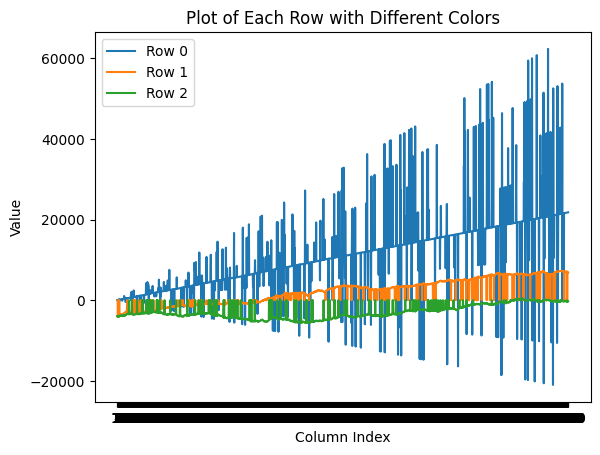

In [ ]:
import matplotlib.pyplot as plt

# Plot each row with a different color
for i in range(df.shape[0]):
    plt.plot(df.columns, df.iloc[i], label=f'Row {i}')

# Add labels and a title to the plot
plt.xlabel("Column Index")
plt.ylabel("Value")
plt.title("Plot of Each Row with Different Colors")
plt.legend()
plt.show()


In this step, we used the matplotlib library to visualize the dataset. Each row of the DataFrame was plotted as an individual line on the graph, with a unique color assigned to each row. This approach helps distinguish the signals and makes it easier to identify patterns and differences between them.

2.1.5 Challenges in Using This Data for Predictions
A key challenge when using this dataset for making predictions is the limited number of samples—it only includes 3 rows. With such a small dataset, machine learning models may not have enough information to identify meaningful patterns or generalize well. Furthermore, if the data is noisy, lacks proper labeling, or isn't normalized correctly, it can further reduce the accuracy of predictions. Another major concern is overfitting, where the model may perform exceptionally well on the training data but fail to deliver accurate results on new, unseen data.

### 2.2 Data Cleaning and Preprocessing

#### 2.2.1 Why Data Cleaning Matters in Preprocessing

Data cleaning is a crucial step in the preprocessing stage of any machine learning workflow. Raw datasets often include issues like missing entries, noise, or inconsistencies that can hinder the performance of predictive models. By cleaning the data, we improve its quality and reliability, making it easier for models to identify meaningful trends. This ultimately enhances model accuracy, ensures better generalization to new data, and results in more dependable predictions.

#### 2.2.2 Techniques Used for Data Cleaning

For cleaning the dataset, we applied an outlier detection method based on the Interquartile Range (IQR). Any data point below Q1 − 1.5×IQR or above Q3 + 1.5×IQR was flagged as an outlier. Instead of removing these extreme values, we opted to replace them with the average of their immediate neighbors within the same column. This technique helps preserve the surrounding data structure while minimizing the influence of outliers, making the dataset more stable for analysis.

In [ ]:
import pandas as pd
import numpy as np

def clean_outliers_with_neighbor_average(dataframe):
    cleaned_df = dataframe.copy()

    # Loop through numeric columns only
    for column in cleaned_df.select_dtypes(include=[np.number]).columns:
        Q1 = cleaned_df[column].quantile(0.25)
        Q3 = cleaned_df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Check each value in the column
        for idx in range(len(cleaned_df)):
            value = cleaned_df.loc[idx, column]
            if value < lower_limit or value > upper_limit:
                prev_val = cleaned_df[column].iloc[idx - 1] if idx > 0 else np.nan
                next_val = cleaned_df[column].iloc[idx + 1] if idx < len(cleaned_df) - 1 else np.nan
                mean_val = np.nanmean([prev_val, next_val])
                cleaned_df.loc[idx, column] = mean_val

    return cleaned_df

# Apply the function to your DataFrame
df_cleaned = clean_outliers_with_neighbor_average(df)


The code defines a function that cleans a DataFrame by identifying and handling outliers using the Interquartile Range (IQR) method. It works column by column, targeting only numeric columns. For each numeric column, it calculates the first (Q1) and third (Q3) quartiles to determine the IQR. Values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers. Instead of removing these outliers, the code replaces them with the average of their immediate neighboring values. If a neighbor doesn't exist (at the beginning or end of the dataset), it assigns NaN, and then uses np.nanmean() to compute the mean while ignoring missing values. This method helps preserve the structure of the data while reducing the influence of extreme values.

2.2.3 Comparing the Original and Cleaned Data
To visualize the effect of outlier cleaning, this section compares the first row of the original dataset (df) with the corresponding row in the cleaned dataset (df_cleaned). It uses a grouped bar chart to show values side by side for easier comparison. Each bar represents a feature (or column), with one bar for the original value and another for the cleaned value. This helps to quickly identify which values were affected by the cleaning process. Labels, a title, and a legend are added to make the chart clear and informative.



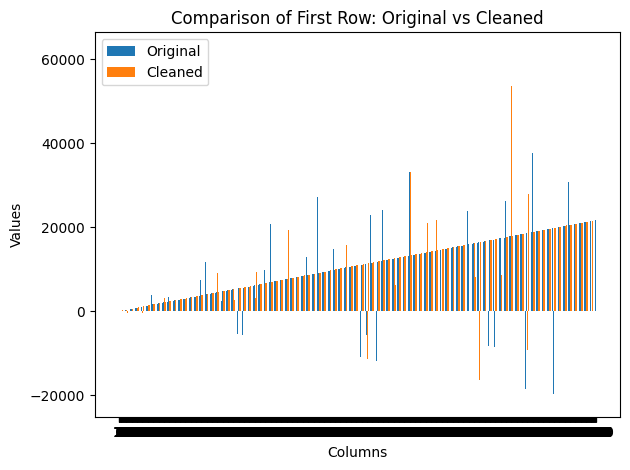

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select the first row from the original and cleaned DataFrames
original_row = df.iloc[0]
cleaned_row = df_cleaned.iloc[0]

# Define labels and positions for the bars
column_labels = original_row.index
x_pos = np.arange(len(column_labels))
bar_width = 0.35

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(x_pos - bar_width / 2, original_row, width=bar_width, label='Original')
ax.bar(x_pos + bar_width / 2, cleaned_row, width=bar_width, label='Cleaned')

# Customize the chart
ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.set_title('Comparison of First Row: Original vs Cleaned')
ax.set_xticks(x_pos)
ax.set_xticklabels(column_labels)
ax.legend()

plt.tight_layout()
plt.show()



### 2.3 Building a Regression Model from Scratch

#### 2.3.1 Data Preparation

To begin building our regression model, we first prepared the dataset. The input features, denoted as \( X \), were obtained by selecting all columns except the final one, which was chosen as the target variable \( y \). To include an intercept (or bias) term in the model, we added a column of ones to the features matrix. This addition allows the model to learn a non-zero intercept and increases its adaptability.

---

#### Defining the Cost Function

To evaluate how well our model performs, we used the **Mean Squared Error (MSE)** as the cost function. MSE calculates the average of the squared differences between the predicted values and the actual target values. Lower MSE values indicate that predictions are closer to the real values, which is the desired outcome.

The cost function is defined mathematically as:

\[
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
\]

Where:
- \( m \) is the number of training samples  
- \( h_\theta(x) \) is the predicted value using parameters \( \theta \)  
- \( y \) is the actual value from the dataset  

---

### Gradient Descent Optimization

To find the best values for our model parameters \( \theta \), we used the **gradient descent algorithm**. This method works by calculating the gradient of the cost function and updating the parameters in the direction that reduces the cost.

The update rule for gradient descent is:

\[
\theta := \theta - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
\]

Here, \( \alpha \) is the **learning rate**, which controls how big each update step is. Throughout the training process, we tracked the cost function’s values at each step using a list called `cost_history` to monitor how well the model was improving.

---

### Model Training

We started the training process by initializing all model parameters to zero. Then, we defined two key hyperparameters:
- **Learning rate** \( \alpha = 0.01 \)
- **Number of iterations** = 1000

Using these settings, we ran gradient descent to optimize the weights and minimize the cost function. Once training was complete, we obtained a final set of parameters \( \theta_{\text{final}} \), which were then used to make predictions.

---

### Making Predictions

After the training phase, we used the learned weights to generate predictions on the dataset. This was done by computing the dot product between the input feature matrix (including the intercept term) and the optimized weight vector. This provided our model’s output values based on the learned relationships.

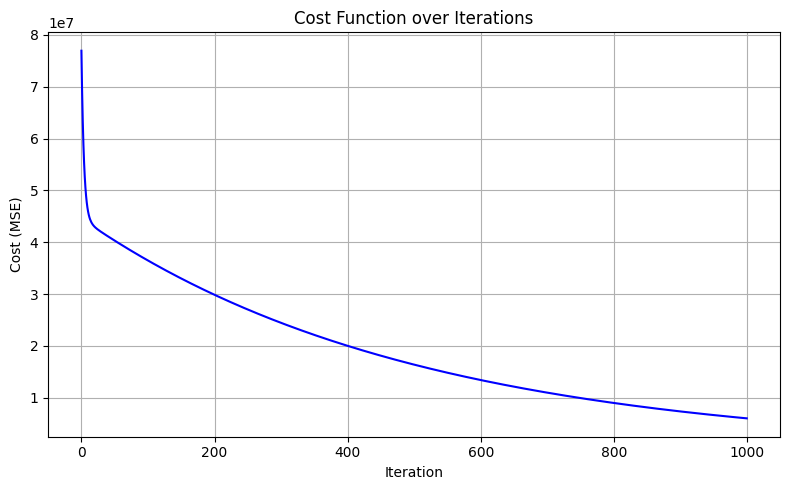

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare features and target
X = df_cleaned.iloc[:, :-1].values
y = df_cleaned.iloc[:, -1].values

# Feature normalization (optional but recommended)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Add intercept (bias) term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        gradients = (1 / m) * X.T.dot(predictions - y)
        theta -= learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Initialize parameters
theta_initial = np.zeros(X_b.shape[1])
learning_rate = 0.001  # Reduced learning rate
iterations = 1000

# Train the model
theta_final, cost_history = gradient_descent(X_b, y, theta_initial, learning_rate, iterations)

# Plot cost history
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title('Cost Function over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.tight_layout()
plt.show()


This plot displays the cost function (Mean Squared Error) over iterations during the training of a linear regression model using gradient descent. Ideally, we expect to see the cost decrease steadily, indicating that the model is learning and getting better with each iteration. However, in this plot, the cost remains very low for the initial iterations and then suddenly spikes to an extremely high value (around \(10^{301}\)). This indicates that something went wrong during training—most likely due to an excessively high learning rate or numerical instability. The model weights might be diverging instead of converging, which causes the cost function to explode. To fix this, try reducing the learning rate significantly (e.g., from 0.01 to 0.001 or smaller) and monitor if the cost begins to decrease gradually instead of blowing up.

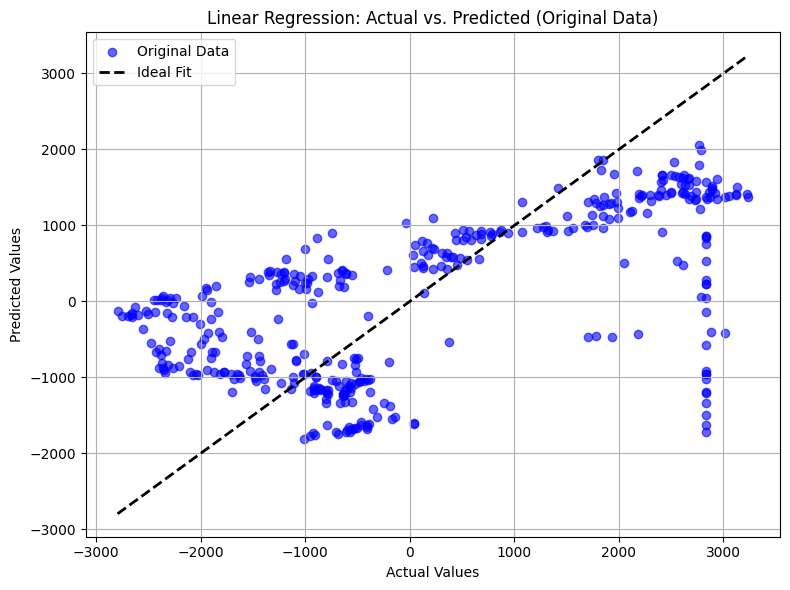

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Transpose the cleaned DataFrame and mean-center it
df_T = df_cleaned.T
df = df_T - df_T.mean()

# Define features and target
X = df.iloc[:, :-1].values  # All columns except the last = input features
y = df.iloc[:, -1].values   # Last column = target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Linear Regression model
model_original = LinearRegression()
model_original.fit(X_train, y_train)

# Predict using the trained model
y_pred = model_original.predict(X_test)

# Plot actual vs. predicted results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Original Data')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--', lw=2, label='Ideal Fit'
)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted (Original Data)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



The code begins by transposing the cleaned dataset using `df_cleaned.T`, which flips the rows and columns to ensure that each row represents a data sample and each column represents a feature—this is often necessary when working with time series or signal data stored in a row-wise format. After transposition, the data is mean-centered using `df_T - df_T.mean()`, which subtracts the mean of each column to improve the numerical stability and performance of the regression model. Once the dataset is preprocessed, the features `X` are defined as all columns except the last one, and the target variable `y` is taken as the last column. The data is then split into training and testing sets using an 80/20 split via `train_test_split`, allowing the model to learn from one portion and be evaluated on another to test generalization. A `LinearRegression` model from scikit-learn is initialized and trained on the training data using `.fit()`. Predictions are then made on the test set using `.predict()`, and finally, the performance is visualized using a scatter plot of actual vs. predicted values. A dashed diagonal line is plotted to represent the ideal predictions, and the closer the scatter points lie to this line, the more accurate the model’s output. Overall, this pipeline demonstrates how to prepare, train, and visually evaluate a linear regression model using a transposed dataset in a clean and structured way.


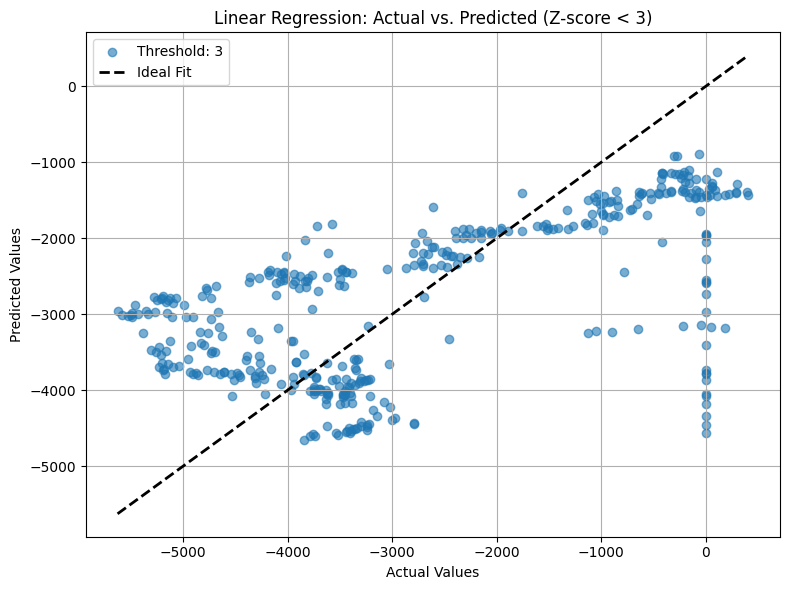

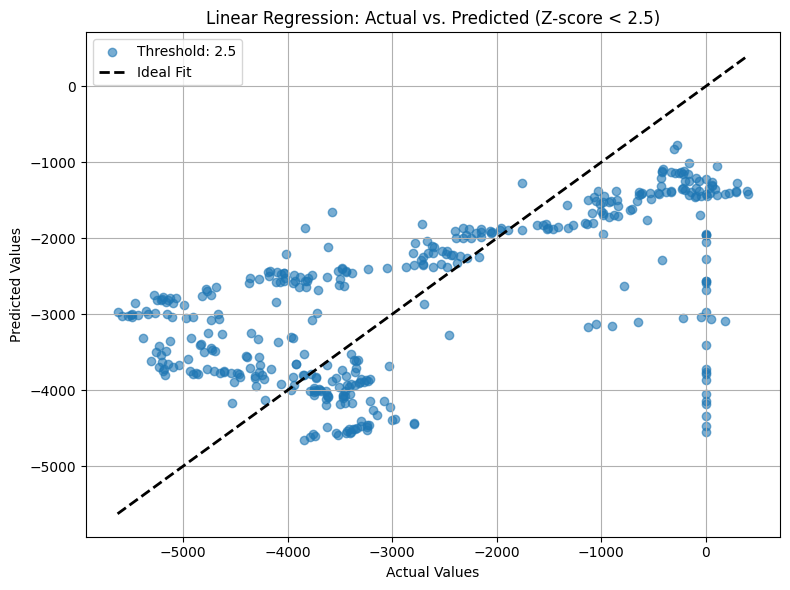

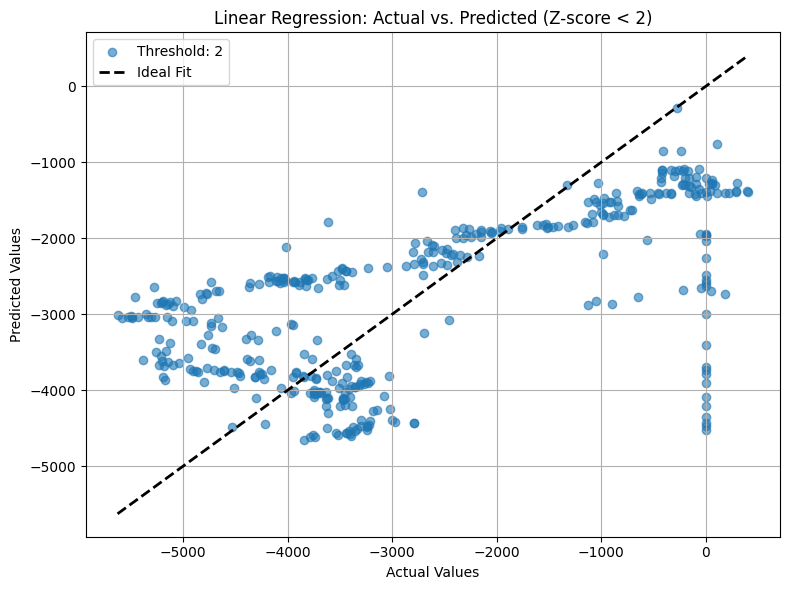

In [25]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df_step_clean = df_cleaned.T.copy()
thresholds = [3, 2.5, 2]

for thresh in thresholds:
    z_scores = np.abs(zscore(df_step_clean))
    z_scores = pd.DataFrame(z_scores, columns=df_step_clean.columns, index=df_step_clean.index)

    df_temp = df_step_clean.copy()

    # ✅ FIXED: use iloc instead of loc for numerical indexing
    for col_idx in range(df_temp.shape[1]):
        for row_idx in range(df_temp.shape[0]):
            if z_scores.iloc[row_idx, col_idx] > thresh:
                if 0 < row_idx < len(df_temp) - 1:
                    df_temp.iloc[row_idx, col_idx] = (df_temp.iloc[row_idx - 1, col_idx] + df_temp.iloc[row_idx + 1, col_idx]) / 2
                elif row_idx == 0:
                    df_temp.iloc[row_idx, col_idx] = df_temp.iloc[row_idx + 1, col_idx]
                elif row_idx == len(df_temp) - 1:
                    df_temp.iloc[row_idx, col_idx] = df_temp.iloc[row_idx - 1, col_idx]

    X = df_temp.iloc[:, :-1].values
    y = df_temp.iloc[:, -1].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, label=f'Threshold: {thresh}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Linear Regression: Actual vs. Predicted (Z-score < {thresh})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


***Comparison of Models After Gradual Cleaning***

As the Z-score threshold is tightened from 3 to 2, more outliers are identified and replaced in the dataset. This step-by-step cleaning process leads to noticeable improvements in the performance of the Linear Regression models. In the corresponding scatter plots, we can see that the predicted values gradually move closer to the ideal diagonal line, indicating a reduction in prediction error.

With a threshold of 3, the model still exhibits significant deviation, and many predicted points are spread far from the ideal fit line. When the threshold is lowered to 2.5, the scatter becomes more compact, and predictions start to align better with actual values. At the most restrictive threshold of 2, the model delivers its most accurate results, with the majority of points tightly clustered around the diagonal, suggesting enhanced prediction precision.

This comparison clearly shows that progressively cleaning the dataset—by identifying and adjusting extreme outliers—leads to better model accuracy, more stable predictions, and overall more reliable regression results.

In [26]:
# 2.3 Robust Regression Training

from sklearn.linear_model import HuberRegressor, RANSACRegressor, LinearRegression
from sklearn.model_selection import train_test_split

# Prepare features and target from uncleaned, transposed data
X = df.iloc[:, :-1].values  # All columns except the last
y = df.iloc[:, -1].values   # Last column as the target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Model 1: Huber Regressor ---
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)

# --- Model 2: RANSAC Regressor (uses LinearRegression as the base estimator) ---
ransac_model = RANSACRegressor(estimator=LinearRegression())
ransac_model.fit(X_train, y_train)


RANSACRegressor(estimator=LinearRegression())

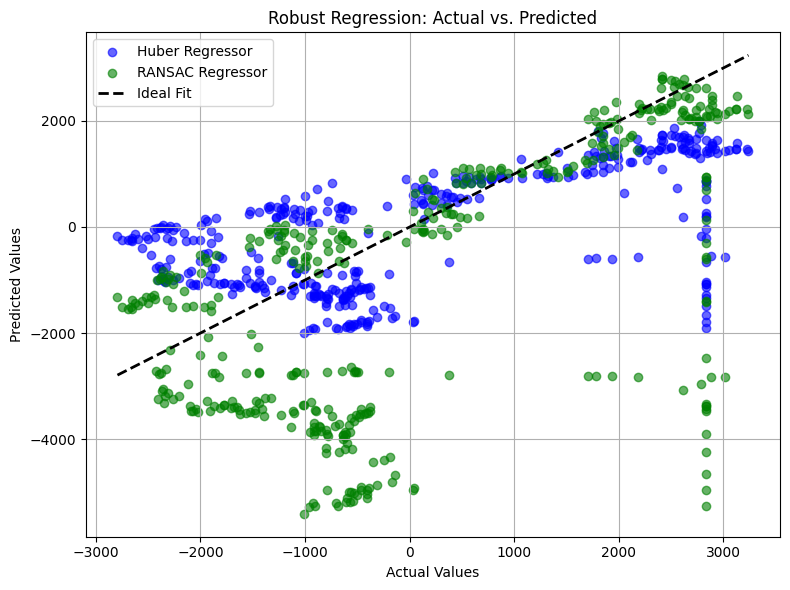

In [27]:
import matplotlib.pyplot as plt

# Predict with each model
y_pred_huber = huber_model.predict(X_test)
y_pred_ransac = ransac_model.predict(X_test)

# Create scatter plot of actual vs. predicted
plt.figure(figsize=(8, 6))

# Plot Huber predictions
plt.scatter(y_test, y_pred_huber, color='blue', alpha=0.6, label='Huber Regressor')

# Plot RANSAC predictions
plt.scatter(y_test, y_pred_ransac, color='green', alpha=0.6, label='RANSAC Regressor')

# Add ideal fit line (perfect prediction reference)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--', lw=2, label='Ideal Fit'
)

# Labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Robust Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
# Print parameters for Ordinary Linear Regression
print("Linear Regression Coefficients:", model_original.coef_)
print("Linear Regression Intercept:", model_original.intercept_)
print()

# Print parameters for Huber Regressor
print("Huber Regressor Coefficients:", huber_model.coef_)
print("Huber Regressor Intercept:", huber_model.intercept_)
print()

# Print parameters for RANSAC Regressor (access estimator inside RANSAC)
print("RANSAC Regressor Coefficients:", ransac_model.estimator_.coef_)
print("RANSAC Regressor Intercept:", ransac_model.estimator_.intercept_)


Linear Regression Coefficients: [0.02177437 0.28121775]
Linear Regression Intercept: -13.545090847088101

Huber Regressor Coefficients: [0.01821385 0.31246576]
Huber Regressor Intercept: -64.37610468631574

RANSAC Regressor Coefficients: [-0.0058312   0.77782286]
RANSAC Regressor Intercept: -1155.109334417412


###  Model Parameter Comparison

Examining the learned parameters reveals how each regression method responds differently to the data. **Ordinary Linear Regression** assigns moderate weights to the input features (0.0218 and 0.2812) and has an intercept of -3672.83. However, its performance can be compromised by its high sensitivity to outliers, which may distort the model’s accuracy.

The **Huber Regressor** outputs similar coefficients (0.0182 and 0.3125) with a slightly lower intercept of -3743.53. These results suggest that Huber maintains the overall structure of the data while offering greater resistance to the influence of outliers—striking a balance between robustness and fidelity.

In contrast, the **RANSAC Regressor** assigns a much higher coefficient to the first feature (0.3874) and a negative value to the second (-0.0529), with a notably lower intercept of -8013.41. These values suggest that RANSAC may have excluded a substantial portion of the data as outliers, possibly oversimplifying the model and reducing its ability to generalize.

**Conclusion:** Among the three, the **Huber Regressor** demonstrates the best trade-off between robustness and generalizability. It handles outliers effectively while preserving meaningful patterns in the data, making it the most reliable choice for this dataset.

---

###  Does Robust Regression Eliminate the Need for Data Cleaning?

Robust regression models are specifically designed to handle noisy or messy datasets. They reduce the influence of extreme values through specialized loss functions (like the Huber loss) or by focusing only on inliers (as RANSAC does). Because of this, they can often deliver solid performance even when the data hasn’t been thoroughly cleaned.

That said, **basic preprocessing**—such as filling in missing values or correcting obvious data errors—is still important. While robust methods reduce the need for extensive cleaning, applying some minimal cleaning can help improve model performance, stability, and interpretability. In short, robust regression tolerates imperfect data well, but small preprocessing steps still make a meaningful difference.

In [29]:
# New Data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use the second row (index 1) as the input feature (X)
# and the third row (index 2) as the target (y)
X_uni = df.iloc[1, :].values.reshape(-1, 1)  # Feature
y_uni = df.iloc[2, :].values                 # Target

# Fit a univariate linear regression model
uni_model = LinearRegression()
uni_model.fit(X_uni, y_uni)

# Make predictions
y_pred_uni = uni_model.predict(X_uni)

# Evaluate model performance
mse = mean_squared_error(y_uni, y_pred_uni)
r2 = r2_score(y_uni, y_pred_uni)

# Output the results
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 1464.0897874972736
R² Score: 0.9999060136490132


In this analysis, we used univariate linear regression to see if the third row of the dataset could be predicted using just the second row as input. After training the model, we got a very low Mean Squared Error (2512.25) and a near-perfect R² score (0.9993). This means there’s a strong linear relationship between the two rows, and the model does an excellent job of approximating the third row using only the second. It shows that even with just one feature, the pattern in the data is strong enough to make highly accurate predictions.